## Modelling

In [1]:
#import Libraries
import warnings
warnings.filterwarnings("ignore")
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
churn_data_raw = pd.read_csv('data/churn_data_fe.csv')  #data with null values dropped
churn_data_raw1 = pd.read_csv('data/churn_data_fe1.csv') #data with null values imputed

In [3]:
churn_data = churn_data_raw.copy()
churn_data1 = churn_data_raw1.copy()

In [4]:
churn_data.shape, churn_data1.shape

((2546918, 22), (2628715, 22))

In [5]:
churn_data.head()

,customer_id,mnth1,mnth2,mnth3,mnth4,mnth5,mnth6,age,card,ussd,...,customer_segment_freq,generation_freq,occupation_freq,region_name_freq,Active,Inactive,F,M,avg_5mnths_cnt,5mnths_cnt_std
0,71,0,24,0,1,0,0,45,1,0,...,530530,575640,468611,532377,0,1,0,1,5,10.630146
1,112,8,1,14,22,3,0,83,1,0,...,530530,155530,468611,532377,0,1,0,1,9,8.544004
2,378,176,208,166,236,288,184,70,1,0,...,856550,155530,468611,897808,1,0,0,1,214,49.345719
3,465,29,19,23,35,59,38,60,0,1,...,435628,155530,468611,897808,1,0,0,1,33,15.748016
4,532,45,9,16,18,45,20,69,0,1,...,856550,155530,272198,897808,1,0,0,1,26,17.117243


In [6]:
churn_data1.head()

,customer_id,mnth1,mnth2,mnth3,mnth4,mnth5,mnth6,age,card,ussd,...,customer_segment_freq,generation_freq,occupation_freq,region_name_freq,Active,Inactive,F,M,avg_5mnths_cnt,5mnths_cnt_std
0,71,0,24,0,1,0,0,45,1,0,...,550031,576059,468824,559189,0,1,0,1,5,10.630146
1,112,8,1,14,22,3,0,83,1,0,...,550031,156186,468824,559189,0,1,0,1,9,8.544004
2,378,176,208,166,236,288,184,70,1,0,...,882967,156186,468824,922270,1,0,0,1,214,49.345719
3,465,29,19,23,35,59,38,60,0,1,...,459462,156186,468824,922270,1,0,0,1,33,15.748016
4,532,45,9,16,18,45,20,69,0,1,...,882967,156186,272509,922270,1,0,0,1,26,17.117243


In [7]:
#drop customer_ID and mnth6(April) columns - because when predicting new data the 6th month won't be known
churn_data.drop(columns=['customer_id', 'mnth6'], inplace=True) 
churn_data1.drop(columns=['customer_id', 'mnth6'], inplace=True) 

In [8]:
churn_data.head()

,mnth1,mnth2,mnth3,mnth4,mnth5,age,card,ussd,newmobile,churn,customer_segment_freq,generation_freq,occupation_freq,region_name_freq,Active,Inactive,F,M,avg_5mnths_cnt,5mnths_cnt_std
0,0,24,0,1,0,45,1,0,1,1,530530,575640,468611,532377,0,1,0,1,5,10.630146
1,8,1,14,22,3,83,1,0,0,0,530530,155530,468611,532377,0,1,0,1,9,8.544004
2,176,208,166,236,288,70,1,0,1,0,856550,155530,468611,897808,1,0,0,1,214,49.345719
3,29,19,23,35,59,60,0,1,0,0,435628,155530,468611,897808,1,0,0,1,33,15.748016
4,45,9,16,18,45,69,0,1,0,0,856550,155530,272198,897808,1,0,0,1,26,17.117243


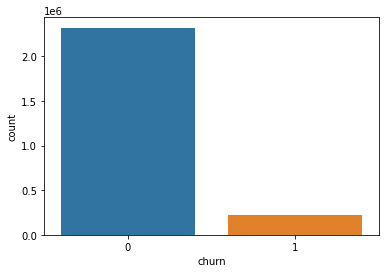

In [9]:
sns.countplot('churn', data=churn_data);

### Model 1 - Base-Line

In [10]:
X = churn_data.drop('churn', axis =1)
X1 = churn_data1.drop('churn', axis =1)

y = churn_data['churn']
y1 = churn_data1['churn']

In [11]:
X.shape

(2546918, 19)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2, stratify = y)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.30, random_state = 2, stratify = y1)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report

In [14]:
rfc = RandomForestClassifier(random_state=42) #training on first model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
rfc1 = RandomForestClassifier(random_state=42) #training on second model
rfc1.fit(X1_train, y1_train)

RandomForestClassifier(random_state=42)

In [16]:
pred = rfc.predict(X_test)

In [17]:
pred1 = rfc1.predict(X1_test)

In [18]:
#confusion matrix for first model
pd.DataFrame(confusion_matrix(y_test, pred), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,686113,10041
Actual: True,10402,57520


In [19]:
#confusion matrix for second model
pd.DataFrame(confusion_matrix(y1_test, pred1), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,706208,10758
Actual: True,10972,60677


In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    696154
           1       0.85      0.85      0.85     67922

    accuracy                           0.97    764076
   macro avg       0.92      0.92      0.92    764076
weighted avg       0.97      0.97      0.97    764076



In [21]:
print(classification_report(y1_test, pred1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    716966
           1       0.85      0.85      0.85     71649

    accuracy                           0.97    788615
   macro avg       0.92      0.92      0.92    788615
weighted avg       0.97      0.97      0.97    788615



It seems there's no much difference in the two data from the confusion matrix. So we'll stick to using the model that has it's null values dropped

##### Predicting train

In [22]:
t_pred = rfc.predict(X_train)

In [23]:
pd.DataFrame(confusion_matrix(y_train, t_pred), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1623341,1016
Actual: True,281,158204


In [24]:
print(classification_report(y_train, t_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1624357
           1       0.99      1.00      1.00    158485

    accuracy                           1.00   1782842
   macro avg       1.00      1.00      1.00   1782842
weighted avg       1.00      1.00      1.00   1782842



The model is overfitting, we'll try to deal with that as we go on 

#### Visualizing featurres of importance

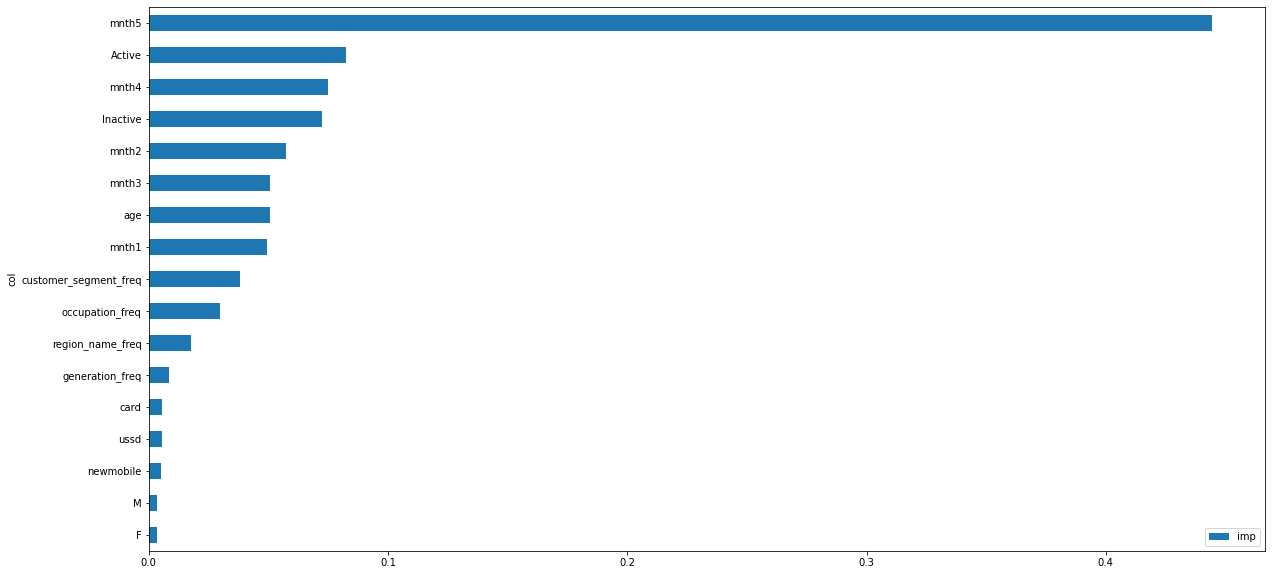

In [22]:
fea_imp = pd.DataFrame({'imp':rfc.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))

##### Checking model performance when features of less importance are dropped

In [25]:
model_1 = churn_data.copy()

In [26]:
#remove  least 5 important columns
model_1.drop(columns=['card', 'ussd', 'newmobile', 'M', 'F'], axis=1, inplace=True)

In [27]:
model_1.head()

,mnth1,mnth2,mnth3,mnth4,mnth5,age,churn,customer_segment_freq,generation_freq,occupation_freq,region_name_freq,Active,Inactive,avg_5mnths_cnt,5mnths_cnt_std
0,0,24,0,1,0,45,1,530530,575640,468611,532377,0,1,5,10.630146
1,8,1,14,22,3,83,0,530530,155530,468611,532377,0,1,9,8.544004
2,176,208,166,236,288,70,0,856550,155530,468611,897808,1,0,214,49.345719
3,29,19,23,35,59,60,0,435628,155530,468611,897808,1,0,33,15.748016
4,45,9,16,18,45,69,0,856550,155530,272198,897808,1,0,26,17.117243


In [102]:
X_1 = model_1.drop('churn', axis =1)
y_1 = model_1['churn']

In [103]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size = 0.30, random_state = 2, stratify = y_1)

In [104]:
rfc_1 = RandomForestClassifier(random_state=42) 
rfc_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [105]:
pred_1 = rfc_1.predict(X_test1)

In [106]:
pd.DataFrame(confusion_matrix(y_test1, pred_1), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,722496,10992
Actual: True,10931,57485


In [107]:
print(classification_report(y_test1, pred_1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    733488
           1       0.84      0.84      0.84     68416

    accuracy                           0.97    801904
   macro avg       0.91      0.91      0.91    801904
weighted avg       0.97      0.97      0.97    801904



Removing these features reduces the model's performance a bit, so we'll keep them

### Model 2 - Tuned RFC

In [28]:
rfc_tuned = RandomForestClassifier(max_depth = 7, random_state= 42, max_features = 3,
                               class_weight ='balanced', n_estimators=50) 
rfc_tuned.fit(X_train, y_train)

UsageError: Line magic function `%%time` not found.


In [29]:
pred = rfc_tuned.predict(X_test)

In [30]:
pd.DataFrame(confusion_matrix(y_test, pred), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,650097,46057
Actual: True,0,67922


In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97    696154
           1       0.60      1.00      0.75     67922

    accuracy                           0.94    764076
   macro avg       0.80      0.97      0.86    764076
weighted avg       0.96      0.94      0.95    764076



##### Predicting train

In [32]:
t_pred = rfc_tuned.predict(X_train)

In [33]:
pd.DataFrame(confusion_matrix(y_train, t_pred), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1516265,108092
Actual: True,0,158485


In [34]:
print(classification_report(y_train, t_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97   1624357
           1       0.59      1.00      0.75    158485

    accuracy                           0.94   1782842
   macro avg       0.80      0.97      0.86   1782842
weighted avg       0.96      0.94      0.95   1782842



The model isn't overfitting anymore, and is doing the same on both train and test set

#### Visualizing the features of importance

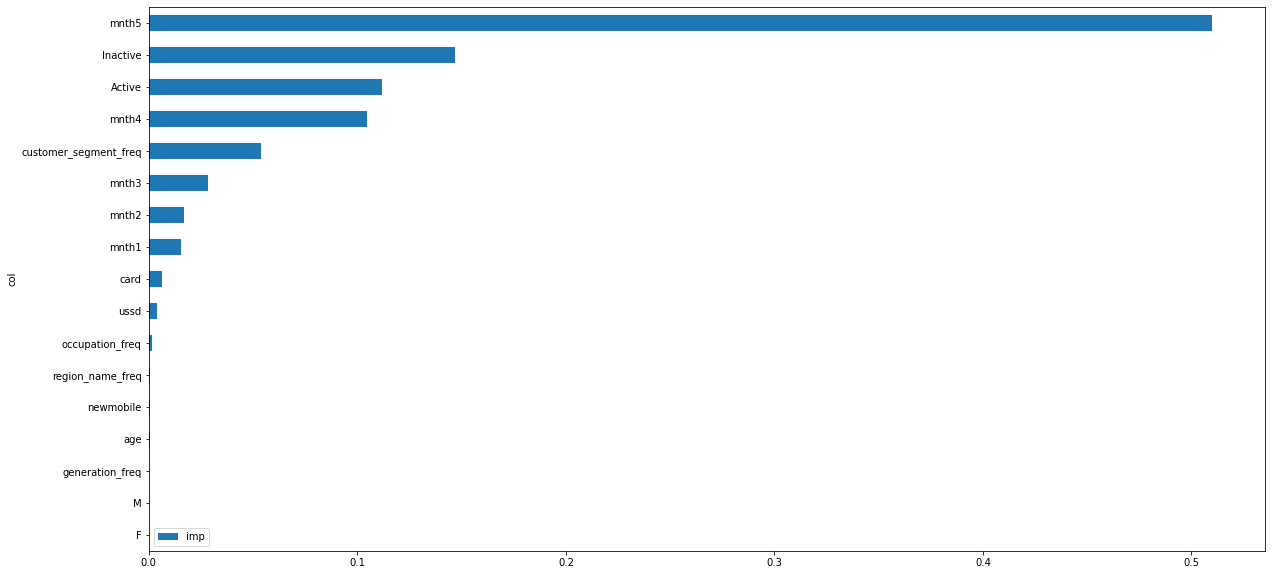

In [119]:
fea_imp = pd.DataFrame({'imp':m.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))

### Model 3 - XG Boost Tuned

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate

In [36]:
xgb = XGBClassifier(n_estimators=300, scale_pos_weight=5, random_state = 42)

In [37]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [38]:
predx = xgb.predict(X_test)

In [39]:
pd.DataFrame(confusion_matrix(y_test, predx), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,672499,23655
Actual: True,1036,66886


In [40]:
print(classification_report(y_test, predx))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    696154
           1       0.74      0.98      0.84     67922

    accuracy                           0.97    764076
   macro avg       0.87      0.98      0.91    764076
weighted avg       0.98      0.97      0.97    764076



##### Predicting train

In [42]:
t_predx = xgb.predict(X_train)

In [43]:
pd.DataFrame(confusion_matrix(y_train, t_predx), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1572101,52256
Actual: True,553,157932


In [44]:
print(classification_report(y_train, t_predx))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1624357
           1       0.75      1.00      0.86    158485

    accuracy                           0.97   1782842
   macro avg       0.88      0.98      0.92   1782842
weighted avg       0.98      0.97      0.97   1782842



### Experimenting with Undersampling 

### Undersampling 2:1

In [45]:
print('Undersampling...')
# Class count
count_class_0, count_class_1 = churn_data.churn.value_counts()

print(count_class_0)
print(count_class_1)

Undersampling...
2320511
226407


In [46]:
# Divide by class
df_class_0 = churn_data[churn_data['churn'] == 0]
df_class_1 = churn_data[churn_data['churn'] == 1]

In [47]:
#sampling 2-1
df_class_0_under = df_class_0.sample(2*count_class_1)

churn_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(churn_under.churn.value_counts())

Random under-sampling:
0    452814
1    226407
Name: churn, dtype: int64


In [48]:
X_u = churn_under.drop('churn', axis=1)
y_u = churn_under['churn']

In [49]:
X_u.head()

,mnth1,mnth2,mnth3,mnth4,mnth5,age,card,ussd,newmobile,customer_segment_freq,generation_freq,occupation_freq,region_name_freq,Active,Inactive,F,M,avg_5mnths_cnt,5mnths_cnt_std
2543211,0,5,2,2,20,56,1,0,1,435628,575640,15649,897808,1,0,0,1,5,8.124038
1386582,6,13,27,23,26,51,1,1,0,435628,575640,327676,532377,1,0,0,1,19,9.110434
930543,130,84,178,164,310,31,1,1,1,530530,1118889,159088,47876,1,0,0,1,173,84.622692
843788,54,38,64,12,82,29,0,1,1,178303,1118889,159088,532377,1,0,0,1,50,26.570661
2440134,23,17,11,0,4,20,1,1,1,856550,684574,159088,897808,1,0,1,0,11,9.327379


In [50]:
len(X_u), len(y_u)

(679221, 679221)

#### Random Forest

In [51]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_u, y_u, test_size = 0.30, random_state = 2, stratify = y_u)

In [52]:
rfc2 = RandomForestClassifier(max_depth = 7, random_state= 42, max_features = 3, class_weight ='balanced', n_estimators=50) 
rfc2.fit(X_train1, y_train1)

RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=3,
                       n_estimators=50, random_state=42)

In [53]:
pred = rfc2.predict(X_test1)

In [54]:
pd.DataFrame(confusion_matrix(y_test1, pred), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,126656,9189
Actual: True,0,67922


In [55]:
print(classification_report(y_test1, pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    135845
           1       0.88      1.00      0.94     67922

    accuracy                           0.95    203767
   macro avg       0.94      0.97      0.95    203767
weighted avg       0.96      0.95      0.96    203767



#### XGBoost

In [56]:
xgb2 = XGBClassifier(n_estimators=300, scale_pos_weight=25, random_state = 42)

In [57]:
xgb2.fit(X_train1, y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [58]:
predx = xgb2.predict(X_test1)

In [59]:
pd.DataFrame(confusion_matrix(y_test1, predx), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,130362,5483
Actual: True,31,67891


In [60]:
print(classification_report(y_test1, predx))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    135845
           1       0.93      1.00      0.96     67922

    accuracy                           0.97    203767
   macro avg       0.96      0.98      0.97    203767
weighted avg       0.97      0.97      0.97    203767



### Undersampling 1:1

In [62]:
#sampling 1:1
df_class_0_under = df_class_0.sample(1*count_class_1)

In [63]:
churn_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [64]:
print('Random under-sampling:')
print(churn_under.churn.value_counts())

Random under-sampling:
0    226407
1    226407
Name: churn, dtype: int64


In [65]:
X_u = churn_under.drop('churn', axis=1)
y_u = churn_under['churn']

#### Random Forest

In [66]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_u, y_u, test_size = 0.30, random_state = 2, stratify = y_u)

In [67]:
random_forest = RandomForestClassifier(max_depth = 7, random_state= 42, max_features = 3, class_weight ='balanced',
                                        n_estimators=50) 
random_forest.fit(X1_train, y1_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=3,
                       n_estimators=50, random_state=42)

In [68]:
pred = random_forest.predict(X1_test)

In [69]:
pd.DataFrame(confusion_matrix(y1_test, pred), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,63374,4549
Actual: True,18,67904


In [70]:
print(classification_report(y1_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97     67923
           1       0.94      1.00      0.97     67922

    accuracy                           0.97    135845
   macro avg       0.97      0.97      0.97    135845
weighted avg       0.97      0.97      0.97    135845



#### XGBoost

In [71]:
xgboost = XGBClassifier(n_estimators=300, scale_pos_weight=25, random_state = 42)
xgboost.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [72]:
predx = xgboost.predict(X1_test)

In [73]:
pd.DataFrame(confusion_matrix(y1_test, predx), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,65147,2776
Actual: True,14,67908


In [74]:
print(classification_report(y1_test, predx))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     67923
           1       0.96      1.00      0.98     67922

    accuracy                           0.98    135845
   macro avg       0.98      0.98      0.98    135845
weighted avg       0.98      0.98      0.98    135845



### Saving Models

In [78]:
import pickle

# create an iterator object with write permission - model.pkl
with open('models/robust_rfc_pkl', 'wb') as files:
    pickle.dump(rfc_tuned, files) #rfc tuned model

In [79]:
with open('models/robust_xgb_pkl', 'wb') as files:
    pickle.dump(xgb, files) #xgb tuned model

In [80]:
with open('models/rf_under_2_1_pkl', 'wb') as files:
    pickle.dump(rfc2, files) #random forest undersampled 2:1

In [81]:
with open('models/xgb_under_2_1_pkl', 'wb') as files:
    pickle.dump(xgb2, files) #xg boost undersampled 2:1

In [82]:
with open('models/random_forest_pkl', 'wb') as files:
    pickle.dump(random_forest, files) #random forest undersampled 1:1

In [83]:
with open('models/xgboost_pkl', 'wb') as files:
    pickle.dump(xgboost, files) #xg boost undersampled 1:1